<center><h1> Buyer Analysis & Classification</h1></center>

<center><img src='./img/bird.jpeg'></center>

<font color=white>/</font>

### Background

This project was completed individually as part of a full-day hackathon for GA's Data Science Immersive. Project was completed in 7 hours. The presentation was completed afterward for use in portfolio.

<font color=white>/</font>

### Data

The data I chose was a dataset on customer transactions from 2010-2011 for an online retailer, made public by the UC Irvine Machine Learning Repository. Documentation and full dataset can be downloaded [here.](https://archive.ics.uci.edu/ml/datasets/online+retail)

<font color=white>/</font>

### Research Questions

* Which products are most popular worldwide, and by country?
* What is the likelihood of a customer purchasing <code>item 1</code>, given their past purchases?
* Which purchases are most important in determining the probability of a customer purchasing <code>item 1</code>?

<p></p>
<br />

<font color=white>/</font>

### Imports

In [14]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./data/data.csv', encoding= 'unicode_escape')

<font color=white>/</font>

## Data Cleaning/Exploratory Analysis

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
df.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

<font color=white>.</font>

#### Data Collection date range

In [48]:
df['invoicedate']=pd.to_datetime(df['invoicedate'])

In [61]:
df['invoicedate'].min(), df['invoicedate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

<font color=white>.</font>

#### Countries included

In [69]:
df['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [71]:
len(list(df['country'].unique()))

37

<font color=white>.</font>

#### Nulls

Dropped all entries that are missing an item description or customer ID.

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
total          0
dtype: int64

In [51]:
df.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [52]:
df['total']=df['unitprice']*df['quantity']

In [250]:
# Drop all rows where description is "discount", "manual", or "postage"

df = df.drop(df[df['description']=='Discount'].index)
df = df.drop(df[df['description']=='Manual'].index)
df = df.drop(df[df['description']=='Postage'].index)

<font color=white>.</font>

#### Top Individual Spenders

In [582]:
len(df['customerid'].unique())

4363

In [172]:
pd.merge(df.groupby('customerid').sum().sort_values(by = 'total', ascending=False)[['quantity', 'total']], 
         buyers, left_on='customerid', right_on='customerid').head(10)

,quantity,total,country
customerid,,,
14646.0,197200,279801.02,Netherlands
18102.0,64124,259657.30,United Kingdom
17450.0,69041,189735.53,United Kingdom
14911.0,77235,133090.85,EIRE
12415.0,77242,123725.45,Australia
14156.0,57029,114517.47,EIRE
17511.0,63033,88193.23,United Kingdom
16684.0,49391,65920.12,United Kingdom
14096.0,16352,65164.79,United Kingdom


Dataset also seems to includes items that are being returned, and negative total (money returned to customers.) Need to check out rows for these customers to see if they include initial purchase, or return only.

#### Top Individual Returners

In [107]:
pd.merge(df[df['quantity']<0].groupby('customerid').sum().sort_values(by = 'total', ascending=True)[['quantity', 'total']], buyers, left_on='customerid', right_on='customerid')

,quantity,total,country
customerid,,,
16446.0,-80995,-168469.60,United Kingdom
12346.0,-74215,-77183.60,United Kingdom
15749.0,-9014,-22998.40,United Kingdom
16029.0,-8005,-22830.99,United Kingdom
12931.0,-4427,-8511.15,United Kingdom
...,...,...,...
12933.0,-1,-1.25,United Kingdom
17164.0,-1,-0.95,United Kingdom
16566.0,-1,-0.65,United Kingdom


At a glance, the UK seems to be topping the charts for returning the most items.

In [150]:
df[df['customerid']==16446.0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60


* This person spent $168,469.60 on 80,995 "PAPER CRAFT , LITTLE BIRDIE" and then returned it 12 minutes later.

In [151]:
df[df['customerid']==14213.0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total
5232,C536850,22942,CHRISTMAS LIGHTS 10 SANTAS,-48,2010-12-03 09:47:00,7.65,14213.0,United Kingdom,-367.2
5233,C536850,22689,DOORMAT MERRY CHRISTMAS RED,-50,2010-12-03 09:47:00,6.75,14213.0,United Kingdom,-337.5
5234,C536850,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,-50,2010-12-03 09:47:00,2.55,14213.0,United Kingdom,-127.5
5235,C536850,22580,ADVENT CALENDAR GINGHAM SACK,-48,2010-12-03 09:47:00,4.95,14213.0,United Kingdom,-237.6
5236,C536850,22186,RED STAR CARD HOLDER,-48,2010-12-03 09:47:00,2.55,14213.0,United Kingdom,-122.4


* This person returned many items that they had bought before data collection began, so there are no entries for their original purchases.

#### Item Returns

A customer returning an item implies that they bought it at one point, but not everyone has their initial purchases listed in the dataset. This makes their overall spend amount show as negative and affects overall analysis.

In order to even out stats for returners and total spend on each product, I duplicated the unmatched return rows, took the absolute value of the quantity and total, and appended the "fake" purchases onto the original dataframe.

Since I won't be looking at purchase time data in depth, I set the purchase timestamps to '2010-11-01 07:00:00' (1 month before the earliest date in data collection. This also  should account for winter seasonal items, hopefully.) 

~1000 rows in ~40,000 total rows of data

In [274]:
# Find rows where purchase was returned but no row for purchase made
negs = df[df['quantity']<0] #8653

# Join positive purchases on stockcode and customerid
negs.merge(right=df[df['quantity']>0], how='left', left_on=['customerid', 'description'], right_on=['customerid', 'description']).isna().sum()

invoiceno_x      0
stockcode_x      0
description      0
quantity_x       0
invoicedate_x    0
unitprice_x      0
customerid       0
country_x        0
total_x          0
invoiceno_y      0
stockcode_y      0
quantity_y       0
invoicedate_y    0
unitprice_y      0
country_y        0
total_y          0
dtype: int64

In [275]:
diff = negs.merge(right=df[df['quantity']>0], how='left', left_on=['customerid', 'description'], right_on=['customerid', 'description'])
diff = diff[diff['invoiceno_y'].isna()].iloc[:, :9]
diff.columns=df.columns
diff['invoicedate']='2010-11-01 07:00:00'
diff['quantity']=np.absolute(diff['quantity'])
diff['total']=np.absolute(diff['total'])

In [154]:
# Don't run me twice
df = pd.concat(objs=[df, diff], axis=0)

<font color=white>.</font>

Checking work

In [155]:
negs = df[df['quantity']<0] #8653

# Join positive purchases on stockcode and customerid
negs.merge(right=df[df['quantity']>0], how='left', left_on=['customerid', 'description'], right_on=['customerid', 'description']).isna().sum()

invoiceno_x      0
stockcode_x      0
description      0
quantity_x       0
invoicedate_x    0
unitprice_x      0
customerid       0
country_x        0
total_x          0
invoiceno_y      0
stockcode_y      0
quantity_y       0
invoicedate_y    0
unitprice_y      0
country_y        0
total_y          0
dtype: int64

 ## Exploratory Analysis

### Top customers

In [100]:
df.groupby('customerid').count().sort_values(by = 'invoiceno', ascending=False).head(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,country,total
customerid,,,,,,,,
17841.0,7971,7971,7971,7971,7971,7971,7971,7971
14911.0,5898,5898,5898,5898,5898,5898,5898,5898
14096.0,5127,5127,5127,5127,5127,5127,5127,5127
12748.0,4625,4625,4625,4625,4625,4625,4625,4625
14606.0,2780,2780,2780,2780,2780,2780,2780,2780
15311.0,2491,2491,2491,2491,2491,2491,2491,2491
14646.0,2083,2083,2083,2083,2083,2083,2083,2083
13089.0,1857,1857,1857,1857,1857,1857,1857,1857
13263.0,1673,1673,1673,1673,1673,1673,1673,1673


### Most popular products

<span style='color:green'><h4> Total number of individual purchases for each item (quantity per order not considered). </h4></span>

In [252]:
pop = pd.DataFrame(df.groupby('description').count().sort_values(by = 'invoiceno', ascending=False)['invoiceno']).reset_index()
pop.head(10)

,description,invoiceno
0,WHITE HANGING HEART T-LIGHT HOLDER,2072
1,REGENCY CAKESTAND 3 TIER,1913
2,JUMBO BAG RED RETROSPOT,1663
3,ASSORTED COLOUR BIRD ORNAMENT,1419
4,PARTY BUNTING,1416
5,LUNCH BAG RED RETROSPOT,1358
6,POSTAGE,1252
7,SET OF 3 CAKE TINS PANTRY DESIGN,1232
8,LUNCH BAG BLACK SKULL.,1126
9,PACK OF 72 RETROSPOT CAKE CASES,1081


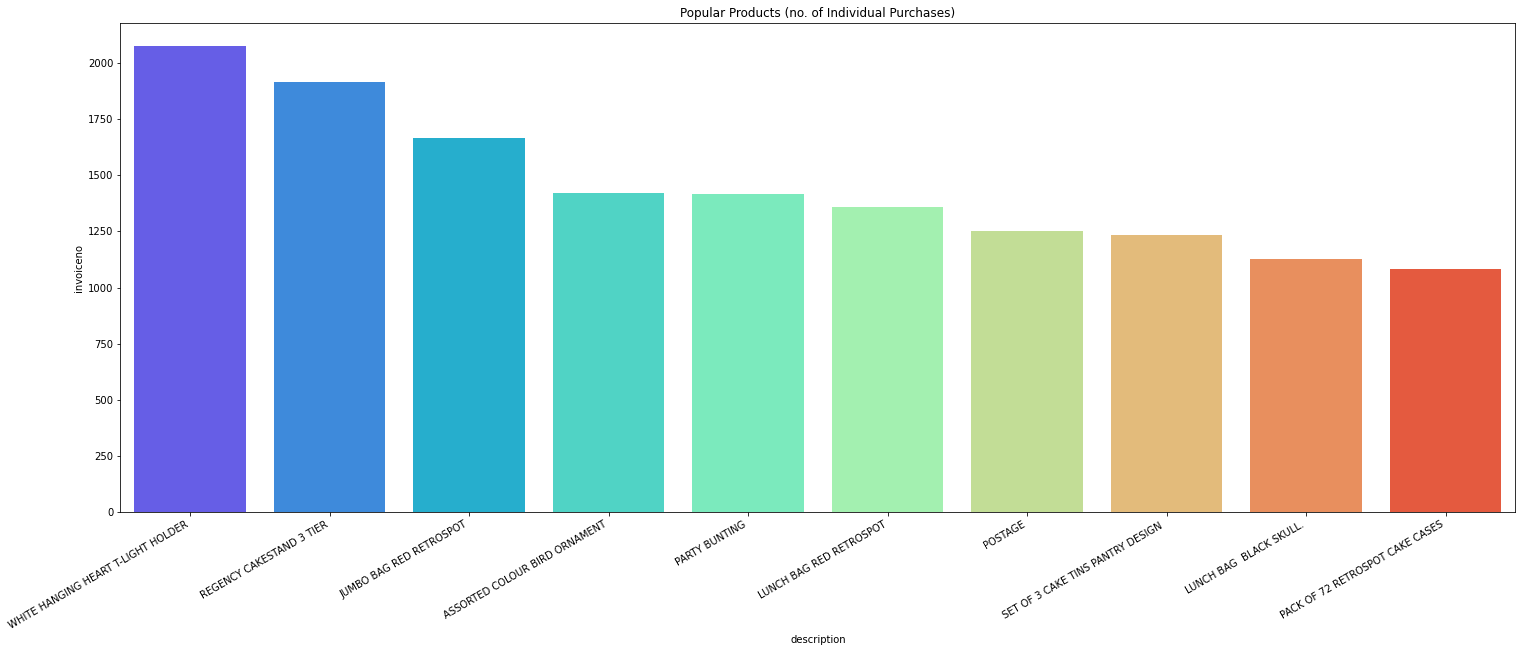

In [327]:
plt.figure(figsize=(25, 9))
sns.set(font_scale = 2)

axs = sns.barplot(data=pop.head(10), x='description', y='invoiceno', palette=sns.color_palette("rainbow", n_colors=10))
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right')
axs.set_title("Popular Products (no. of Individual Purchases)")
plt.show()

#### Total # of units sold for each product (quantity sold per order is condered, so items that are generally ordered in multiples will rank higher.)

In [211]:
num = pd.DataFrame(df.groupby('description').sum().sort_values(by = 'quantity', ascending=False)['quantity']).reset_index()
num.head(10)

,description,quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1,JUMBO BAG RED RETROSPOT,45070
2,ASSORTED COLOUR BIRD ORNAMENT,35315
3,WHITE HANGING HEART T-LIGHT HOLDER,34149
4,PACK OF 72 RETROSPOT CAKE CASES,33417
5,POPCORN HOLDER,30510
6,RABBIT NIGHT LIGHT,27094
7,MINI PAINT SET VINTAGE,25880
8,PACK OF 12 LONDON TISSUES,25321
9,PACK OF 60 PINK PAISLEY CAKE CASES,24167


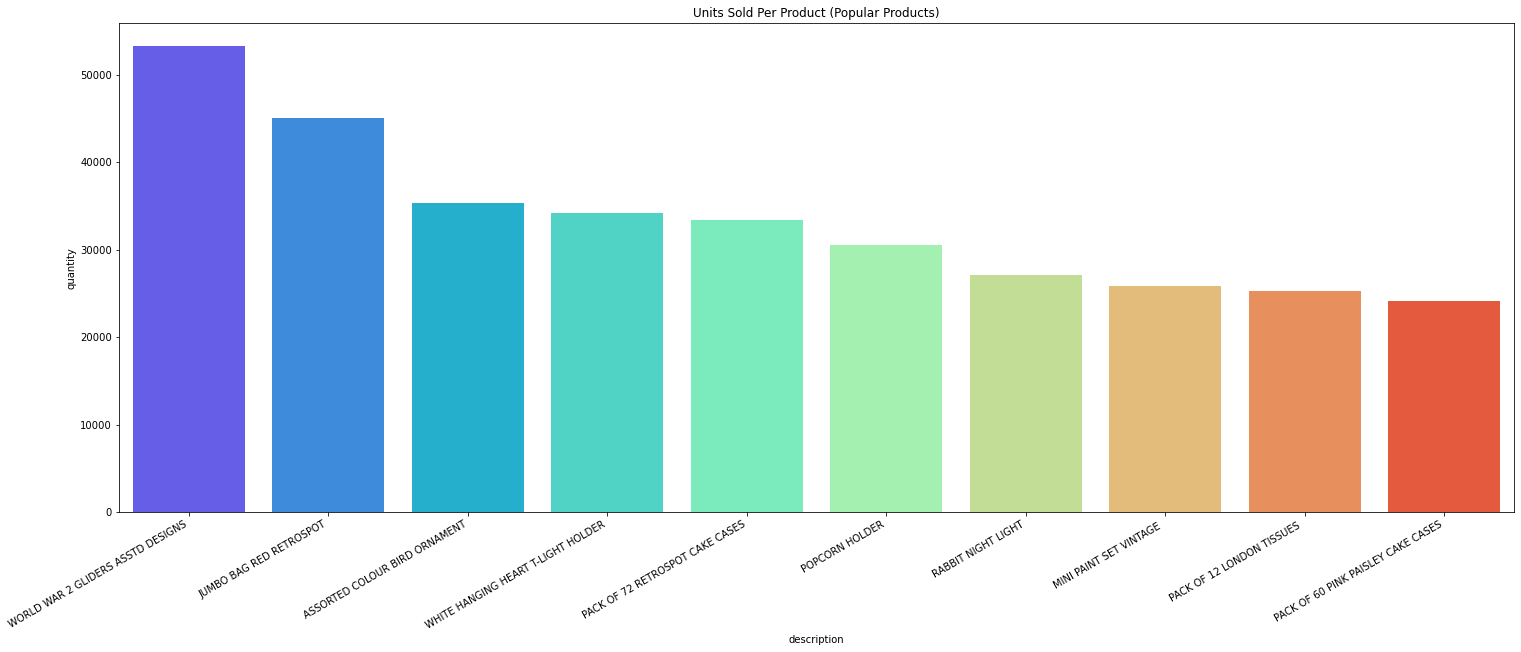

In [326]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.figure(figsize=(25, 9))
axs = sns.barplot(data=num.head(10), x='description', y='quantity', palette=sns.color_palette("rainbow", n_colors=10))
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right')
axs.set_title("Units Sold Per Product (Popular Products)")
plt.show()

#### Wide individual appeal products - these products were purchased by the most unique customers (<code>customerid</code>)

In [208]:
ind = df.groupby('description').nunique().sort_values(by = 'customerid', ascending=False)[['customerid', 'country']].reset_index()
ind.head(10)

,description,customerid,country
0,REGENCY CAKESTAND 3 TIER,887,29
1,WHITE HANGING HEART T-LIGHT HOLDER,858,16
2,PARTY BUNTING,708,20
3,ASSORTED COLOUR BIRD ORNAMENT,679,16
4,SET OF 3 CAKE TINS PANTRY DESIGN,640,22
5,JUMBO BAG RED RETROSPOT,636,20
6,PACK OF 72 RETROSPOT CAKE CASES,636,20
7,PAPER CHAIN KIT 50'S CHRISTMAS,615,10
8,NATURAL SLATE HEART CHALKBOARD,590,12
9,BAKING SET 9 PIECE RETROSPOT,585,23


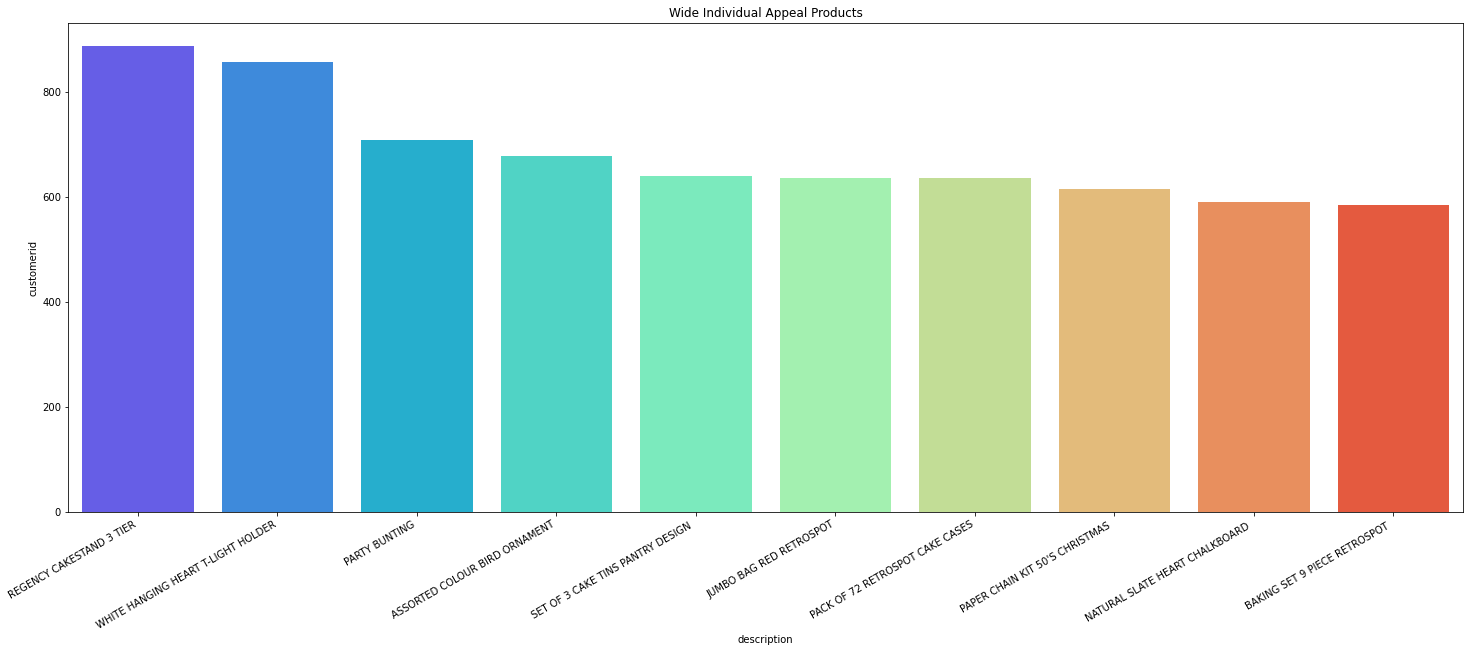

In [324]:
plt.figure(figsize=(25, 9))
axs = sns.barplot(data=ind.head(10), x='description', y='customerid', palette=sns.color_palette("rainbow", n_colors=10))
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right')
axs.set_title("Wide Individual Appeal Products")
plt.show()

 #### Wide international appeal products - these products were purchased most often by customers in many different countries. 

In [209]:
int = df.groupby('description').nunique().sort_values(by = 'country', ascending=False)[['customerid', 'country']].reset_index()
int.head(10)

,description,customerid,country
0,REGENCY CAKESTAND 3 TIER,887,29
1,JAM MAKING SET WITH JARS,574,25
2,JAM MAKING SET PRINTED,538,25
3,BAKING SET 9 PIECE RETROSPOT,585,23
4,POSTAGE,379,23
5,SET OF 3 REGENCY CAKE TINS,472,23
6,SET OF 3 CAKE TINS PANTRY DESIGN,640,22
7,RETROSPOT TEA SET CERAMIC 11 PC,489,21
8,ROUND SNACK BOXES SET OF4 WOODLAND,281,21
9,GREEN REGENCY TEACUP AND SAUCER,390,21


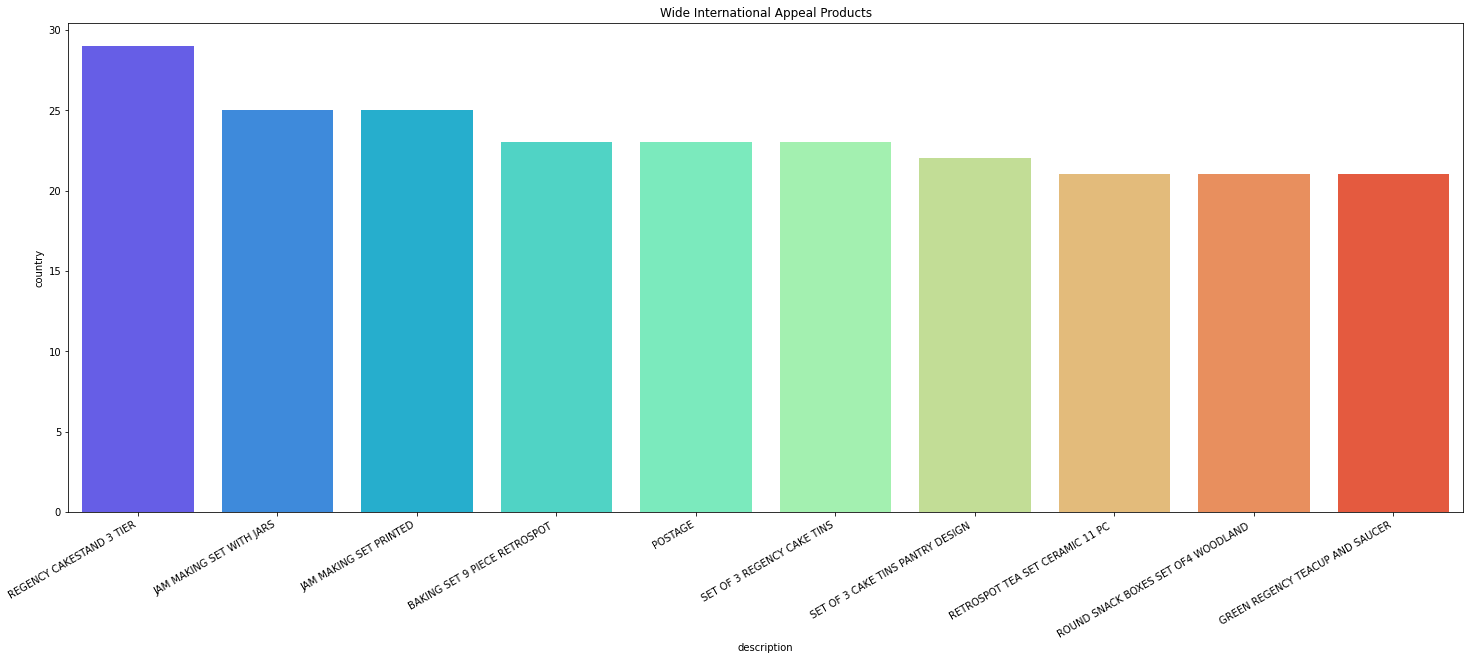

In [325]:
plt.figure(figsize=(25, 9))
axs = sns.barplot(data=int.head(10), x='description', y='country', palette=sns.color_palette("rainbow", n_colors=10))
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right')
axs.set_title("Wide International Appeal Products")
plt.show()

Certain items are appearing over and over - notably baking items - so it would be interesting to have more info on this retailer, their target demographics, and ad spend.

#### Top Purchased Item by Country

In [180]:
a = df.groupby('country').max()['description']
b = df.groupby(['country', 'description']).sum()['quantity'] #pkey = description

pd.merge(a, b, how='left', left_on=(['country', 'description']), right_on=(['country', 'description']))

/var/folders/zd/6jtvs5r55vvdpnl2c2q7kv0m0000gn/T/ipykernel_2470/1844171538.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  a = df.groupby('country').max()['description']


,description,quantity
country,,
Australia,YELLOW GIANT GARDEN THERMOMETER,36
Austria,ZINC WILLIE WINKIE CANDLE STICK,12
Bahrain,VANILLA SCENT CANDLE JEWELLED BOX,6
Belgium,WRAP SUKI AND FRIENDS,50
Brazil,SPACEBOY LUNCH BOX,12
Canada,YELLOW COAT RACK PARIS FASHION,3
Channel Islands,ZINC T-LIGHT HOLDER STARS SMALL,24
Cyprus,ZINC METAL HEART DECORATION,48
Czech Republic,WOODEN TREE CHRISTMAS SCANDINAVIAN,72


Top purchase in Brazil was SPACEBOY LUNCH BOX 

very interesting products being sold here

<center><img src='./img/world.jpeg' height=200 width=200></center>

### Buyer Locations

I need to see if buyers moved, or if the countries attached to <code>customerid</code> are consistent.

*Flipping back into SQL mindset*

In [104]:
buyers = pd.merge(df.groupby('customerid')['country'].max(), df.groupby('customerid')['country'].min(), left_on='customerid', right_on='customerid')
buyers = pd.merge(buyers, df.groupby('customerid')['country'].nunique(), left_on='customerid', right_on='customerid')
buyers[buyers['country_x'] != buyers['country_y']].rename(columns={'country':'country_count'})

,country_x,country_y,country_count
customerid,,,
12370.0,Cyprus,Austria,2
12394.0,Denmark,Belgium,2
12417.0,Spain,Belgium,2
12422.0,Switzerland,Australia,2
12429.0,Denmark,Austria,2
12431.0,Belgium,Australia,2
12455.0,Spain,Cyprus,2
12457.0,Switzerland,Cyprus,2


Not enough differences to cause a problem right now.

In [105]:
buyers=df.groupby('customerid')['country'].max()
buyers.head(5)

customerid
12346.0    United Kingdom
12347.0           Iceland
12348.0           Finland
12349.0             Italy
12350.0            Norway
Name: country, dtype: object

## Preprocessing

 For my modeling, I decided to predict the probability of a customer buying a popular item: 'ASSORTED COLOUR BIRD ORNAMENT' based on data about their other purchases. I chose this item because it was purchased by a large number of individual buyers, across a wide variety of countries.
 
 

*Commented out code: dropped two outliers for the item I'm interested in predicting. This code was not necessary after I converted values to boolean.*

In [356]:
# df[df['description']=='ASSORTED COLOUR BIRD ORNAMENT'].sort_values(by='quantity', ascending=False)

In [283]:
# Dropped two outliers for this item: buyer who purchased over 1000 bird ornaments

In [282]:
# df_bird = df.drop(291249)
# df_bird = df_bird.drop(452365)

 #### Reshaping data

I used pd.pivot_table to make a dataframe with customerid as the primary key, and sum of purchases for each available item as the features. 

* Since all NANs have already been dropped, I filled NaNs resulting from pivot table with 0 to represent no items bought.
* Worth mentioning that this does erase customer return data for people who returned the same # of items they bought (total item quantity averages out to 0) which may misrepresent some smaller patterns in the data, but can return to that later if time.
* However this does solve the issue of outliers for the dependent variable (people who purchased an abnormally high number of bird ornaments.)

In [276]:
df2 = pd.pivot_table(df, values='quantity', index=['customerid'],
                  columns=['description'], aggfunc=np.sum).fillna(0)

In [284]:
df3 = df2.applymap(lambda x: 1 if x > 0 else 0) #Convert to boolean for y1=purchase, 0=no purchase

<font color=white>.</font>

Added countries for buyers from <code>buyers</code> table.

In [285]:
df4 = df3.merge(buyers, left_index=True, right_on='customerid')
df4 = pd.get_dummies(df4, columns=['country'])
df4.head(4)

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,country_RSA,country_Saudi Arabia,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_USA,country_United Arab Emirates,country_United Kingdom,country_Unspecified
customerid,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color=white>.</font>

#### Train test split

Setting up X & y. Since 'ASSORTED COLOUR BIRD ORNAMENT' is a popular purchase (for a large # of customers), I am predicting the likelihood of a customer purchasing this product based on their previous purchases.

In [329]:
X = df4.drop(columns='ASSORTED COLOUR BIRD ORNAMENT')
y = df4['ASSORTED COLOUR BIRD ORNAMENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

<font color=white>.</font>

### Baseline Model

I built a baseline model that predicts the majority class (no bird ornament purchases.)

In [330]:
y.value_counts(normalize=True)

0    0.844832
1    0.155168
Name: ASSORTED COLOUR BIRD ORNAMENT, dtype: float64

<font color=white>.</font>

Due to having imbalanced classes in my data, I used balanced_accuracy_score (aliased as <code>acc</code>) and f1_score (alised as <code>f1</code>) as my metrics, and made sure to consider this when modeling. If I had more time, I might consider trying additional methods to balance the data:

* Redefining features as aggregations of different categories of items (i.e., "Christmas Decorations, general")
* Generating additional fake data for the minority class

In [332]:
from sklearn.metrics import balanced_accuracy_score as acc, f1_score as f1

In [462]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)
preds=dc.predict(X_test)
preds2=dc.predict(X_train)

a0 = pd.DataFrame([{'classifier':'baseline',
                  'train f1':f1(y_train, preds2),
                    'test f1':f1(y_test, preds),
                  'train acc': acc(y_train, preds2),
                  'test acc': acc(y_test, preds) }]  )

<font color=white>.</font>

In [473]:
def x(styler):
    styler.set_caption("Model Testing Results")
    styler.background_gradient(axis=None, vmin=-0.5, vmax=1.4, cmap="RdBu")
    return styler

In [625]:
a0.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,baseline,0.000000,0.000000,0.500000,0.500000


<font color=white>.</font>

My baseline model had a balanced accuracy score of 50%, and an f1 score of 0 (not great). 

However, it performs exactly as expected for a model that makes the same guess every time.


<font color=white>.</font>

## Model Testing

#### ***Logistic Regression***

<img src='./img/logreg.svg' height=160 width=160>

The first model I tried was a simple logistic regression with no normalization. 

Logistic regression has a few limitations, some of which my data may not meet. However, despite this, my basic logistic regression performed fairly well compared to the baseline model.
* It assumes little or no multicollinearity between independent variables (may or may not be true for this  dataset).
* It assumes that the independent variables are linearly related to the log odds.
* Data needs to be scaled. (In this case, it's already boolean data.)
* It requires a large sample size. Number of features should not exceed rows of data. 


In [489]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('lr', LogisticRegression(class_weight='balanced', max_iter=10000, C=0.075, random_state=42))
    ])

# the pipe was not used, but I set it up incase I needed it later.
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2=pipe.predict(X_train)


a = pd.DataFrame([{'classifier':'logreg',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [486]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()

# Grid search for best hyperparams

hyperparams = {
    'C': [0.07, 0.075], #,0.02, 0.05, 1, 5, 0.5, 0.7, 0.4,  0.45, 0.3,0.2, 0.1, 0.15, 0.09, 
    'class_weight': ['balanced'],
    'max_iter': [1000]
}

rcv = RandomizedSearchCV(lr, hyperparams, cv = 5, verbose = 1, error_score = "raise", n_iter = 2, random_state=42)
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


({'max_iter': 1000, 'class_weight': 'balanced', 'C': 0.075},
 0.8395457198216496)

<font color=white>.</font>

In [ ]:
pd.merge(pd.DataFrame(pipe['lr'].coef_, index=X_train.columns).sort_values(by=0, ascending=False),
         num, 
         left_index=True, 
         right_on='description').set_index('description').rename(columns={'description':'item', 0:'importance', 'quantity':'number of unique sales'})

<font color=white>.</font>

In [624]:
a.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,logreg,0.845807,0.586667,0.937736,0.773383


Even with regularization this model is pretty overfit!

<font color=white>.</font>

<font color=white>.</font>

#### ***KNN***

<img src='./img/knn.svg' height=160 width=160>

In [467]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('kn', KNeighborsClassifier(n_neighbors=3, p=1)
    )])
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2 = pipe.predict(X_train)


b = pd.DataFrame( [{'classifier':'KNN',
                'train f1': f1(y_train, preds2),
                'test f1': f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [353]:
kn = KNeighborsClassifier()

# Grid search for best hyperparams

hyperparams = {
    'n_neighbors': [2, 3], #, 5] #, 10] #, 15, 20, 50],
    'p':[1,2],
    #'weights': ['uniform', 'distance']
}

rcv = RandomizedSearchCV(kn, hyperparams, cv = 5, verbose = 1, error_score = "raise", n_iter = 2)
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


({'p': 1, 'n_neighbors': 3}, 0.8450489063193036)

<font color=white>.</font>

In [623]:
b.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,KNN,0.068441,0.034884,0.517717,0.508876


I did not tune additional hyperparameters for this model due to the time it took to run. This model was also overfit, and the f1 score (weighted harmonic mean of precision and recall) was not good in this model. 

Taking a guess - I think this is likely because of the inability to set class weights for KNN in SciKitLearn (at least not without altering source code.) If I had additional time and wanted to improve this model, I'd focus on using additional methods of balancing the classes in my data.

<font color=white>.</font>

<font color=white>.</font>

#### ***Decision Tree***

Decision trees work by splitting on the best determining feature, like a nested "if-then" statement that sorts data into bins for each class.

I thought a decision tree or random forest might work well, since they can handle multicollinearity and a large number of features (due to naturally ignoring the less important ones.)

<img src='./img/tree2.svg' height=160 width=160>

<font color=white>.</font>

In [542]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=9)
    )])
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2 = pipe.predict(X_train)


c = pd.DataFrame([{'classifier':'dec tree',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }]  )

<font color=white>.</font>

In [496]:
dc = DecisionTreeClassifier()

# Grid search for best hyperparams

hyperparams = {
    'splitter': ['best'], # 'random'
    'max_depth': [9], #, 11, 22 ,2, 5, 50, 70, 7, 8           
    'min_samples_split': [2], #, 3, 4                          
    #'max_features': [ ],
    'random_state': [42],
    'class_weight': ['balanced']
}

rcv = RandomizedSearchCV(dc, hyperparams, cv = 5, verbose = 1, error_score = "raise", n_iter = 3)
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'splitter': 'best',
  'random_state': 42,
  'min_samples_split': 2,
  'max_depth': 9,
  'class_weight': 'balanced'},
 0.8083731353736257)

<font color=white>.</font>

In [554]:
pd.merge(pd.DataFrame(pipe['tree'].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).head(20), 
         num, 
         left_index=True, 
         right_on='description').set_index('description').rename(columns={'description':'item', 0:'importance', 'quantity':'number of unique sales'})

,importance,number of unique sales
description,,
PAINTED METAL PEARS ASSORTED,0.281424,4467
REGENCY CAKESTAND 3 TIER,0.097266,11573
HOME BUILDING BLOCK WORD,0.052907,2643
VICTORIAN GLASS HANGING T-LIGHT,0.038282,21984
PACK OF 6 BIRDY GIFT TAGS,0.038067,6017
BOX OF 6 MINI VINTAGE CRACKERS,0.029504,3479
SET 6 PAPER TABLE LANTERN STARS,0.026865,1809
HEART BEADED TRELLIS DECORATION,0.021085,244
FRENCH STYLE EMBOSSED HEART CABINET,0.017959,21


<font color=white>.</font>

In [622]:
c.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,dec tree,0.704918,0.428198,0.844183,0.671020


<font color=white>.</font>

I didn't spend much time on the decision tree because I wanted to try a random forest.

<font color=white>.</font>

<font color=white>.</font>

#### ***Random Forest***

<img src='./img/rf.svg' height=160 width=160>

Random forests work by taking many samples with replacement from the original data (bagging), fitting a decision tree on each sample and creating a model, and combining the predictions (ensembling). 

In order to avoid high correlation between models themselves, decision trees select a random subset of features at each split, instead of the "best" features.

In [530]:
# check default param for max_features
len(list(X_train.columns))**0.5

62.68971207462992

<font color=white>.</font>

In [569]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, n_estimators=85, max_features=300,  min_samples_split=6, max_samples=0.4, min_samples_leaf=4)
    )])
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2=pipe.predict(X_train)


d = pd.DataFrame( [{'classifier':'random forest',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [561]:
rf = RandomForestClassifier()

# Grid search for best hyperparams

hyperparams = {
    'max_samples': [0.4],
    'n_estimators': [85], #10, 50, 150, 200
    'min_samples_split': [6], #2, 3, 4, 5, 
    'max_features': [500], #20, 150, 200,  'auto'
    'max_depth': [None], #, 5, 9, 20
    'min_samples_leaf': [4, 5, 6] #,1,
}

rcv = RandomizedSearchCV(rf, hyperparams, cv = 5, verbose = 1, error_score = "raise", n_iter = 3)
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'n_estimators': 85,
  'min_samples_split': 6,
  'min_samples_leaf': 5,
  'max_samples': 0.4,
  'max_features': 500,
  'max_depth': None},
 0.8777491420967853)

<font color=white>.</font>

In [574]:
top20 = pd.merge(pd.DataFrame(pipe['rf'].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False).head(20), 
         num, 
         left_index=True, 
         right_on='description').set_index('description').rename(columns={'description':'item', 0:'importance', 'quantity':'number of unique sales'})
top20

,importance,number of unique sales
description,,
PAINTED METAL PEARS ASSORTED,0.145839,4467
PACK OF 6 BIRDY GIFT TAGS,0.017280,6017
VICTORIAN METAL POSTCARD SPRING,0.014023,2416
HOME BUILDING BLOCK WORD,0.012405,2643
HEART FILIGREE DOVE SMALL,0.011510,5405
ANTIQUE SILVER T-LIGHT GLASS,0.011038,12658
HEART IVORY TRELLIS SMALL,0.010268,3863
HEART FILIGREE DOVE LARGE,0.010190,2737
REGENCY CAKESTAND 3 TIER,0.009972,11573


<font color=white>.</font>

In [621]:
d.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,random forest,0.528610,0.534413,0.685156,0.688759


Tuning hyperparameters didn't help the model a lot, but it did keep it from overfitting.

<font color=white>.</font>

<font color=white>.</font>

#### ***SVC***

<img src='./img/svm.svg' height=160 width=160>

For SVC, I only passed in my top features from my Random Forest, to reduce dimensionality and overfitting. 

In [580]:
X_train_20 = X_train.loc[:, list(top20.reset_index()['description'])]
X_test_20 = X_test.loc[:, list(top20.reset_index()['description'])]

In [628]:
from sklearn.svm import SVC

# SVC with subset of features

pipe = Pipeline([
    ('svc', SVC(probability=True, class_weight='balanced', C=0.6, break_ties='true')
    )])
    
pipe.fit(X_train_20, y_train)
preds = pipe.predict(X_test_20)
preds2=pipe.predict(X_train_20)


e = pd.DataFrame([{'classifier':'SVC',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [640]:
# SVC with all features

pipe = Pipeline([
    ('svc', SVC(probability=True, class_weight='balanced', C=0.4, break_ties='true')
    )])
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2=pipe.predict(X_train)


e2 = pd.DataFrame([{'classifier':'SVC',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [637]:
rf = SVC()

# Grid search for best hyperparams

hyperparams = {
    'C': [1, 0.6, 0.01, 0.1],
    'class_weight': ['balanced'],
    'break_ties': ['true', 'false'],
    'kernel': ['rbf'],
    'gamma':[1, 0.1, 0.01, 0.001]
}

rcv = RandomizedSearchCV(rf, hyperparams, cv = 5, verbose = 1, error_score = "raise", n_iter = 5)
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'kernel': 'rbf',
  'gamma': 0.1,
  'class_weight': 'balanced',
  'break_ties': 'false',
  'C': 0.6},
 0.8450493732054067)

getting feature importances not possible (or mathematically/computationally taxing) when not using linear kernel due to hyperplane living in a different space than features.

<font color=white>.</font>

In [641]:
pd.concat([e, e2]).reset_index().style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,index,classifier,train f1,test f1,train acc,test acc
0,0,SVC,0.590090,0.526077,0.808844,0.758597
1,0,SVC,0.685714,0.512712,0.882611,0.759290


<font color=white>.</font>

#### ***Naive Bayes***

<img src='./img/bayes.svg' height=160 width=160>

Naive Bayes is based on the bayes principle, which is used to determine the probability of an outcome given the known probability of a related outcome. 

Bayes principle: **P(A|B) = P(A) * P(B|A)/P(B)**

When used for modeling, naive bayes predicts the probability of belonging to class A, when predictor B has already been provided. It's called "naive" because it makes an assumption that the independent variables are independent of each other.

In [607]:
from sklearn.naive_bayes import ComplementNB # Selected due to imbalanced classes

pipe = Pipeline([
    ('nb', ComplementNB(fit_prior=True, alpha=1)
    )])
    
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)
preds2=pipe.predict(X_train)


f = pd.DataFrame( [{'classifier':'complement naive bayes',
                'train f1':f1(y_train, preds2),
                'test f1':f1(y_test, preds),
                'train acc': acc(y_train, preds2),
                'test acc': acc(y_test, preds) }] )

In [609]:
mnb = ComplementNB()

# Grid search for best hyperparams

hyperparams = {
    'alpha': [0.8, 0.9, 1], #0.1, 0.2, 0.3, 0.5, 0.7,
    'fit_prior': [True, False]
}

rcv = RandomizedSearchCV(mnb, hyperparams, cv=5, verbose=1, error_score="raise")
rcv.fit(X_train, y_train)
rcv.best_params_, rcv.best_score_

/Users/rowanschaefer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


({'fit_prior': True, 'alpha': 1}, 0.6956000653640546)

Also difficult to determine feature importances for naive bayes, <code>permutation_importance</code> is taking too long to run.

<font color=white>.</font>

In [619]:
f.style.set_properties(**{'width': '125px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,complement naive bayes,0.508366,0.407547,0.771015,0.682325


<font color=white>.</font>

<font color=white>.</font>

# Model Results

In [613]:
pd.concat([a0, a, b, c, d, e, f]).reset_index(drop=True).style.set_properties(**{'width': '150px', 'height':'30px'}).pipe(x)

,classifier,train f1,test f1,train acc,test acc
0,baseline,0.000000,0.000000,0.500000,0.500000
1,logreg,0.845807,0.586667,0.937736,0.773383
2,KNN,0.068441,0.034884,0.517717,0.508876
3,dec tree,0.704918,0.428198,0.844183,0.671020
4,random forest,0.528610,0.534413,0.685156,0.688759
5,SVC,0.569141,0.518847,0.798916,0.756674
6,complement naive bayes,0.508366,0.407547,0.771015,0.682325


<img src='./img/modeltesting.png' width=830 height=700>

<font size=1>*Additional image included for markdown rendering in github*</font>

<font color=white>.</font>

## Takeaways

* My data had imbalanced classes, I chose to combat this by using balanced_accuracy, f1_score, and class weights with each model due to time constraints. Preliminary models include Random Forest, SVC, Logistic Regression, and Naive Bayes.

* My baseline model predicted the majority class (not buying a bird ornament), and had a f1 score of 0 and balanced accuracy of 0.50 on the testing set. 
  
* I had several models that outperformed the baseline: despite being overfit, the Logistic Regression performed best on the testing set, with test f1 of .58 and balanced accuracy score of .77. If I revisited this model, I would try limiting features based on the feature_importances from my Random Forest model; this may help prevent overfitting.
  
* The SVC model also performed relatively well after tuning hyperparameters to prevent overfitting. 

<font color=white>.</font>

## Next Steps

**Taking a look at preliminary models, there are a couple steps I could take next, given more time to complete the project:**

* Attempting to further reduce overfitting for the two best models (Logistic Regression and SVC), and using Logistic Regression with better feature selection.
* Trying ensembling methods with my best models to create a better-performing model.
* PCA to reduce dimensionality, given the high number of features (products) in the dataset. Or MCA/PCA alternatives, if using boolean data.
* Pulling in additional data or training a model to create categories and subcategories for each item.
* A deeper dive into feature importances for each model.
* Trying additional strategies to balance data.
<br />
<br />


**Additionally, here some other ideas that I could explore for this dataset:**

* Looking at cosine similarity for products and building a product recommender based on previous products ordered.
* Clustering buyers based on their buying habits, or doing customer segmentation with available data.
* Building an app that allows a user to select the product they want to model for.
* Incorporating order dates and times into my modeling.

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

<font color=white>.</font>

#### additional work

In [313]:
from sklearn.decomposition import PCA

In [318]:
df2.head()

description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
customerid,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
X=df2.drop(columns='ASSORTED COLOUR BIRD ORNAMENT')
y=df2['ASSORTED COLOUR BIRD ORNAMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [321]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
pca = PCA()
pca.fit(X_train_ss)